In [1]:
import os
import xml.etree.ElementTree as ET
import chitra
import matplotlib.pyplot as plt
from chitra.image import Chitra

In [2]:

# Set the path to your dataset
dataset_path = 'input'

In [5]:
incomple_pair = 0

# Iterate through all diseases in the crop
for crop in os.listdir(dataset_path):
    crop_path = os.path.join(dataset_path, crop)
    if(os.path.isdir(crop_path)):
        # print(crop_path)
        for disease in os.listdir(crop_path):
            disease_path = os.path.join(crop_path, disease)
            # print(disease_path)
            images_path = os.path.join(disease_path, 'images')
            annotations_path = os.path.join(disease_path, 'annotations')
            # Iterate through all image files
            for image_file in os.listdir(images_path):
                image_path = os.path.join(images_path, image_file)
                _, extension = os.path.splitext(image_file)
                xml_file = os.path.join(annotations_path, image_file.replace(extension, '.xml'))

                # Check if both image and corresponding XML file exist
                if not os.path.exists(xml_file) or not os.path.exists(image_path):
                    incomple_pair += 1
                    print(f"Deleting incomplete pair: {image_file}")
                    os.remove(image_path)  # Remove image file
                    if os.path.exists(xml_file):
                        os.remove(xml_file)  # Remove XML file if image is missing

                # Check if both XML file and corresponding image file exist
                elif not os.path.exists(image_path) or not os.path.exists(xml_file):
                    print(f"Deleting incomplete pair: {image_file}")
                    incomple_pair += 1
                    os.remove(xml_file)  # Remove XML file
                    if os.path.exists(image_path):
                        os.remove(image_path)  # Remove image file if XML is missing
        else:
            pass

print(incomple_pair)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'input\\Corn\\Corn__Cercospora_Leaf_Spot\\images'

In [6]:
tree = ET.parse('./input/Corn/Corn__Cercospora_Leaf_Spot/20230524_104642.xml')
root = tree.getroot()

sample_annotations = []
sample_lables =[]

for obj in root.findall('object'):
    obj_name = obj.find('name').text
    xmin = float(obj.find('bndbox/xmin').text)
    ymin = float(obj.find('bndbox/ymin').text)
    xmax = float(obj.find('bndbox/xmax').text)
    ymax = float(obj.find('bndbox/ymax').text)

# for neighbor in root.iter('bndbox'):
#     xmin = float(neighbor.find('xmin').text)
#     ymin = float(neighbor.find('ymin').text)
#     xmax = float(neighbor.find('xmax').text)
#     ymax = float(neighbor.find('ymax').text)
    
#     print(xmin, ymin, xmax, ymax)
    sample_annotations.append([xmin, ymin, xmax, ymax])
    sample_lables.append(obj_name)
    
print(sample_annotations)
print(sample_lables)

[[2052.6533425223984, 695.8366194486982, 2210.117160578911, 785.8090543644715], [1110.682288077188, 901.0862366003063, 1228.7801516195727, 982.6237557427258], [1647.7463818056513, 912.3327909647779, 1791.1509303928324, 1002.3052258805512], [2491.302549965541, 1275.0341692189893, 2589.7174362508613, 1367.8182427258805], [3326.4231564438314, 1255.3526990811638, 3410.7787732598204, 1339.7018568147014], [877.2984148862853, 1511.2118108728941, 1017.8911095796002, 1592.7493300153137], [534.2522398345968, 799.8672473200612, 643.9145416953825, 903.8978751914242], [1847.3880082701585, 1595.5609686064317, 1948.6147484493451, 1677.0984877488513], [3185.830461750517, 1072.5961906584992, 3256.1268090971744, 1165.3802641653904], [2170.7512060647828, 1204.7432044410414, 2288.849069607167, 1303.1505551301684], [1107.8704341833218, 642.4154862174579, 1265.3342522398345, 729.5762825421133], [258.6905582356995, 1173.8151799387442, 413.3425223983459, 1277.845807810107]]
['Cercospora leaf spot', 'Cercospor

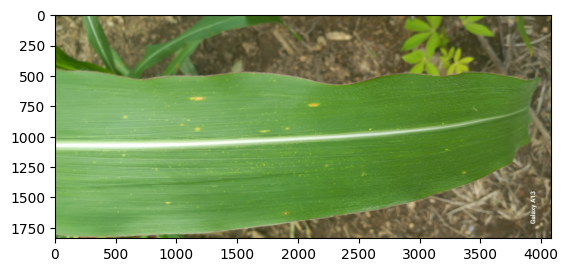

In [8]:
image = Chitra('./input/Corn/Corn__Cercospora_Leaf_Spot/20230524_104642.jpg')
image.imshow()

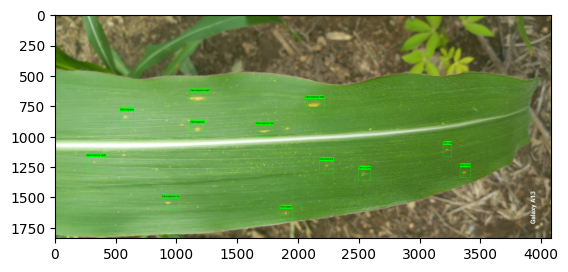

In [9]:
box = sample_annotations
label = sample_lables
image = Chitra('./input/Corn/Corn__Cercospora_Leaf_Spot/20230524_104642.jpg', box, label)
image.image = image.image.convert('RGB')
plt.imshow(image.draw_boxes())


[BoundingBox(x1=321.9848, y1=242.5574, x2=346.6851, y2=273.9204, label=Cercospora leaf spot), BoundingBox(x1=174.2247, y1=314.1041, x2=192.7498, y2=342.5268, label=Cercospora leaf spot), BoundingBox(x1=258.4700, y1=318.0245, x2=280.9648, y2=349.3875, label=Cercospora leaf spot), BoundingBox(x1=390.7925, y1=444.4564, x2=406.2302, y2=476.7994, label=Cercospora leaf spot), BoundingBox(x1=521.7919, y1=437.5957, x2=535.0241, y2=466.9985, label=Cercospora leaf spot), BoundingBox(x1=137.6154, y1=526.7841, x2=159.6692, y2=555.2068, label=Cercospora leaf spot), BoundingBox(x1=83.8043, y1=278.8208, x2=101.0062, y2=315.0842, label=Cercospora leaf spot), BoundingBox(x1=289.7863, y1=556.1868, x2=305.6650, y2=584.6095, label=Cercospora leaf spot), BoundingBox(x1=499.7381, y1=373.8897, x2=510.7650, y2=406.2328, label=Cercospora leaf spot), BoundingBox(x1=340.5100, y1=419.9540, x2=359.0352, y2=454.2572, label=Cercospora leaf spot), BoundingBox(x1=173.7836, y1=223.9357, x2=198.4838, y2=254.3185, label=

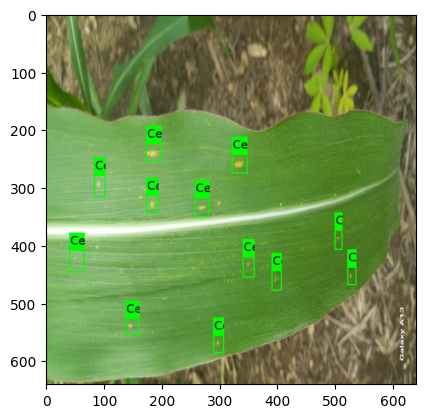

In [10]:
box = sample_annotations
label = sample_lables
image = Chitra('./input/Corn/Corn__Cercospora_Leaf_Spot/20230524_104642.jpg', box, label)
image.resize_image_with_bbox((640, 640))
print(image.bboxes)
print(image.size)
plt.imshow(image.draw_boxes())




In [11]:
import tensorflow as tf
encoded_jpg = tf.image.encode_jpeg(image.image)

print(encoded_jpg)

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x02\x80\x02\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\

In [19]:
image.image.save(fp='images/20230524_104642.jpg')